# Figure 1 - Multiview map of pancreatic gene expression 

### Pre-requisites

In [22]:
import seaborn as sns
import pandas as pd
import numpy as np
import os

import scanpy as sc
import squidpy as sq
import anndata as ad

import matplotlib.pyplot as plt

#sc.settings.set_figure_params(dpi=80, facecolor="white")

### Load data

In [30]:
folder_path = '/lustre/groups/ml01/workspace/sara.jimenez/spatial_pancreas_data/preprocessed_data/data4downstream/'
sample_ids  = ["S1", "S2", "S3"]  
file_suffix = "_npod_annotation_filtered.h5ad"

adatas = []
for sample_id in sample_ids:
    file_name = f"{sample_id}{file_suffix}"
    file_path = os.path.join(folder_path, file_name)
    adata = sc.read_h5ad(file_path)
    adatas.append(adata)
    del adata
adatas

[AnnData object with n_obs × n_vars = 108711 × 979
     obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max'
     uns: 'CellTypes_max_colors', 'cell_type_coarse_colors', 'neighbors', 'pca', 'spatial', 'umap'
     obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_fov'
     layers: 'counts',
 AnnData object with n_obs × n_vars = 126421 × 979
     obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneSt

In [31]:
len(adatas)

3

### Data Exploration

The anndata objects are annotated with different levels of granularity:  
1. ``` 'cell_type_coarse' ``` obs field corresponds to the major pancreatic cell types identified only with the spatial gene panel.
2. ``` 'CellTypes_max' ``` obs field is the mapped annotation from npod dissociated data. The mapping task was performed using the optimal-transport-based tool [moscot](https://moscot.readthedocs.io/en/latest/notebooks/examples/problems/900_annotation_mapping.html).

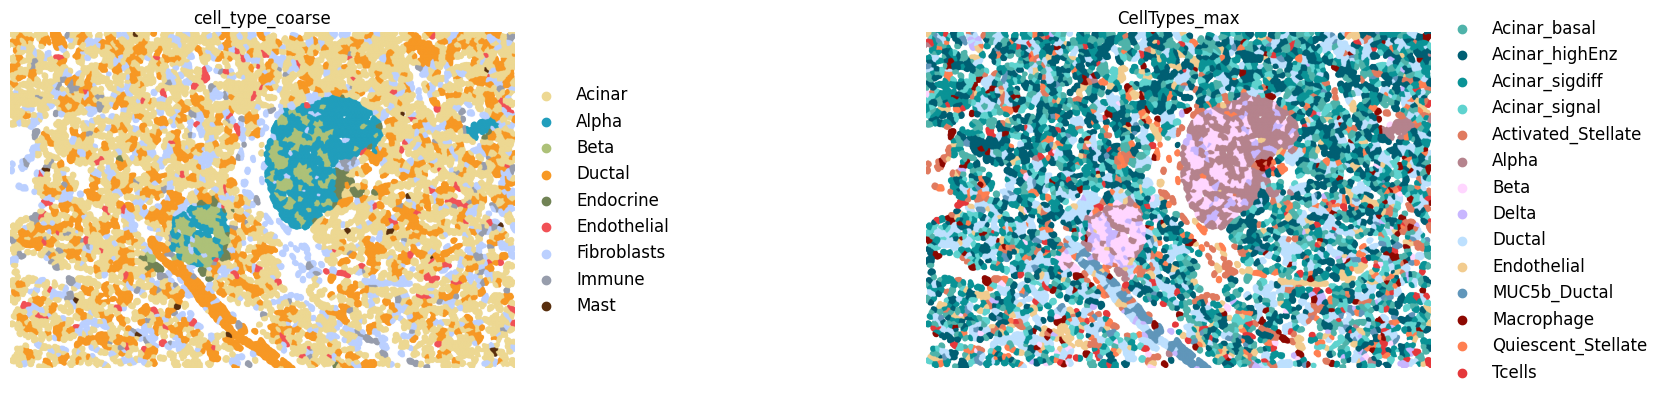

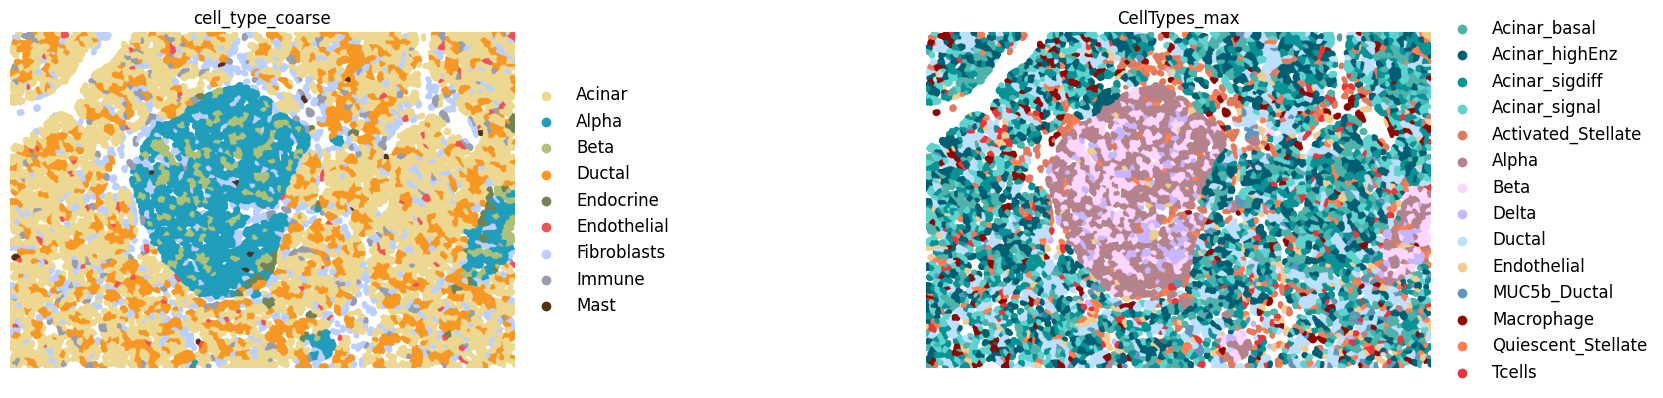

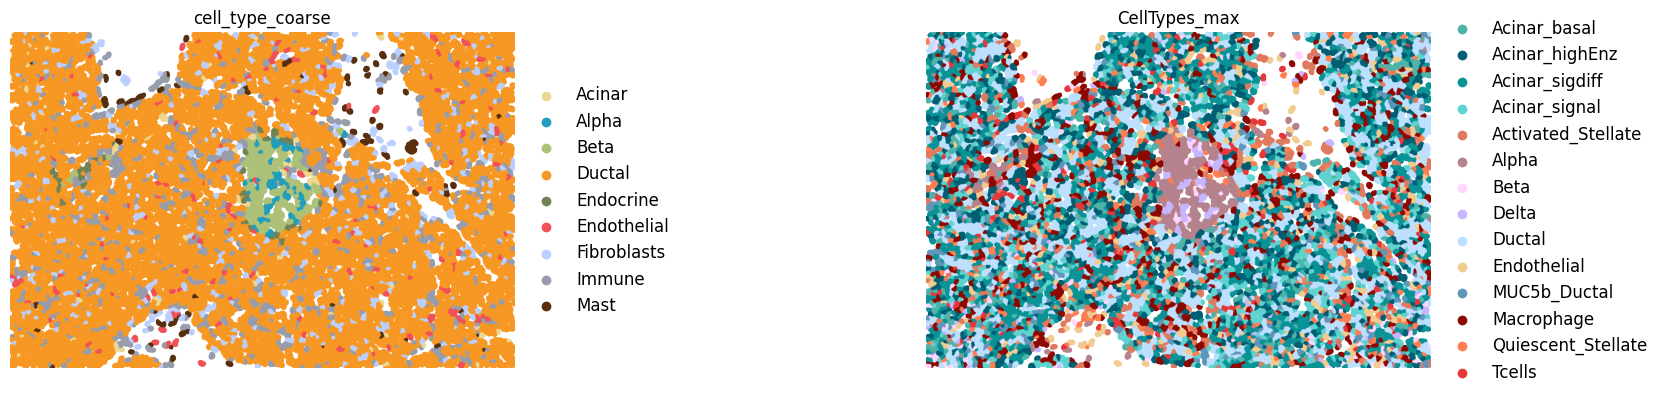

In [8]:
for i in range(len(adatas)):
    sq.pl.spatial_segment(adatas[i],
                          color=['cell_type_coarse','CellTypes_max'],
                          library_id='12',
                          library_key='fov', 
                          seg_cell_id='cell_ID',
                          img=False,frameon=False, wspace=0.5, legend_fontsize=12)

### Refine annotation based on manual inspection 

The spatial gene panel allowed to annotate cells based on marker genes, among those cells, the markers for **Endothelial** and **Mast** cells were very clear. 

In [32]:
x = pd.crosstab(adatas[0].obs.cell_type_coarse,adatas[0].obs.CellTypes_max)
x

CellTypes_max     Acinar_basal  Acinar_highEnz  Acinar_sigdiff  Acinar_signal  \
cell_type_coarse                                                                
Acinar                    9854           17304           16872           7841   
Alpha                        0               0               0              0   
Beta                         0               0               0              0   
Ductal                     315            1776             888            569   
Endocrine                    4              29              23              8   
Endothelial                 48             118             178             46   
Fibroblasts                445             976             754            286   
Immune                      40              79             163             57   
Mast                         2               3               2              1   

CellTypes_max     Activated_Stellate  Alpha  Beta  Delta  Ductal  Endothelial  \
cell_type_coarse                                                                
Acinar                          1061    796  1200    673    1190         1659   
Alpha                             45   2337   371    316       0           28   
Beta                               2   1102  2490    603       2            2   
Ductal                           371    350   316    300   12623          646   
Endocrine                          5    612   295     50       4           13   
Endothelial                      105     23    33     23       6         1614   
Fibroblasts                     3158    138   149    145      82          671   
Immune                           267     37    27     36      22          117   
Mast                             141     24    13    169      13           67   

CellTypes_max     MUC5b_Ductal  Macrophage  Quiescent_Stellate  Tcells  
cell_type_coarse                                                        
Acinar                     719        1273                1817    2081  
Alpha                        0           0                  14       0  
Beta                         0           1                   0       0  
Ductal                    1556         461                 711     470  
Endocrine                    1           2                   7      10  
Endothelial                 13          88                 226      85  
Fibroblasts                 75         192                1405     425  
Immune                      21        1502                  95     129  
Mast                         9          44                  32      24

In [33]:
x = pd.crosstab(adatas[1].obs.cell_type_coarse,adatas[1].obs.CellTypes_max)
x

CellTypes_max     Acinar_basal  Acinar_highEnz  Acinar_sigdiff  Acinar_signal  \
cell_type_coarse                                                                
Acinar                   11705           18392           20288          10204   
Alpha                        0               0               0              0   
Beta                         0               0               0              0   
Ductal                     271            2735            1013            567   
Endocrine                   11              22              13              4   
Endothelial                 42              87             110             25   
Fibroblasts                327             671             469            150   
Immune                      27              70              80             30   
Mast                         1               1               0              2   

CellTypes_max     Activated_Stellate  Alpha  Beta  Delta  Ductal  Endothelial  \
cell_type_coarse                                                                
Acinar                          1417    885  2156    801     683         2042   
Alpha                             54   3738   488    648      10           19   
Beta                               0    870  1137    267       0            1   
Ductal                           705    426   437    312   16887         1262   
Endocrine                          5   1066   166     50      25           17   
Endothelial                       77     20    18      9       4         1468   
Fibroblasts                     2468    157   154    124      77          558   
Immune                           255     35    41     42      36          157   
Mast                             232     56    63    188      26          124   

CellTypes_max     MUC5b_Ductal  Macrophage  Quiescent_Stellate  Tcells  
cell_type_coarse                                                        
Acinar                     825        1625                2250    2343  
Alpha                        1           0                  30       0  
Beta                         0           5                   1       1  
Ductal                    2420         904                1124     766  
Endocrine                    1           2                  16      14  
Endothelial                 11          61                 168      56  
Fibroblasts                 67         149                1355     154  
Immune                      20        1342                  98      92  
Mast                        45          85                  65      45

In [34]:
x = pd.crosstab(adatas[2].obs.cell_type_coarse,adatas[2].obs.CellTypes_max)
x

CellTypes_max     Acinar_basal  Acinar_highEnz  Acinar_sigdiff  Acinar_signal  \
cell_type_coarse                                                                
Acinar                    5659           10888           13711           5596   
Alpha                        0               0               0              0   
Beta                         0               0               0              0   
Ductal                    4146           10836           14156           6435   
Endocrine                   15              24              25              3   
Endothelial                 57             179             281             39   
Fibroblasts                443             988            1214            287   
Immune                      91             274             307            116   
Mast                         1               3               6              0   

CellTypes_max     Activated_Stellate  Alpha  Beta  Delta  Ductal  Endothelial  \
cell_type_coarse                                                                
Acinar                           663    856  1463    585     760          981   
Alpha                             30   1681   175    285       2           32   
Beta                               2   1110  1036    369       0            2   
Ductal                           956   1027  1420    687   23935         2182   
Endocrine                          5    864   184     32       5            7   
Endothelial                       99     38    47     14       0         2576   
Fibroblasts                     3557    199   180    120      15          398   
Immune                          1133    186   133    150      50          364   
Mast                             399    170   119    294      21          161   

CellTypes_max     MUC5b_Ductal  Macrophage  Quiescent_Stellate  Tcells  
cell_type_coarse                                                        
Acinar                     382         781                1044    1070  
Alpha                        0           1                  13       0  
Beta                         1          19                   2       3  
Ductal                    4392        3142                2098    1343  
Endocrine                    2           7                   6       4  
Endothelial                  3          54                 306      73  
Fibroblasts                 13          85                1791     123  
Immune                      42        5448                 285    1082  
Mast                        28         193                  91     129

In [35]:
for i in range(len(adatas)):

    # Ensure 'CellTypes_max' is a categorical column
    if not adatas[i].obs['CellTypes_max'].dtype.name == 'category':
        adatas[i].obs['CellTypes_max'] = adatas[i].obs['CellTypes_max'].astype('category')
    
    # Add the 'Mast' category if it's not already present
    if 'Mast' not in adatas[i].obs['CellTypes_max'].cat.categories:
        adatas[i].obs['CellTypes_max'] = adatas[i].obs['CellTypes_max'].cat.add_categories(['Mast'])
    
    # Update 'CellTypes_max' based on 'cell_type_coarse'
    adatas[i].obs.loc[adatas[i].obs['cell_type_coarse'] == 'Mast', 'CellTypes_max'] = 'Mast'
    adatas[i].obs.loc[adatas[i].obs['cell_type_coarse'] == 'Endothelial', 'CellTypes_max'] = 'Endothelial'
    
    # Optionally, remove unused categories to clean up
    adatas[i].obs['CellTypes_max'] = adatas[i].obs['CellTypes_max'].cat.remove_unused_categories()

In [36]:
x = pd.crosstab(adatas[0].obs.cell_type_coarse,adatas[0].obs.CellTypes_max)
x

CellTypes_max     Acinar_basal  Acinar_highEnz  Acinar_sigdiff  Acinar_signal  \
cell_type_coarse                                                                
Acinar                    9854           17304           16872           7841   
Alpha                        0               0               0              0   
Beta                         0               0               0              0   
Ductal                     315            1776             888            569   
Endocrine                    4              29              23              8   
Endothelial                  0               0               0              0   
Fibroblasts                445             976             754            286   
Immune                      40              79             163             57   
Mast                         0               0               0              0   

CellTypes_max     Activated_Stellate  Alpha  Beta  Delta  Ductal  Endothelial  \
cell_type_coarse                                                                
Acinar                          1061    796  1200    673    1190         1659   
Alpha                             45   2337   371    316       0           28   
Beta                               2   1102  2490    603       2            2   
Ductal                           371    350   316    300   12623          646   
Endocrine                          5    612   295     50       4           13   
Endothelial                        0      0     0      0       0         2606   
Fibroblasts                     3158    138   149    145      82          671   
Immune                           267     37    27     36      22          117   
Mast                               0      0     0      0       0            0   

CellTypes_max     MUC5b_Ductal  Macrophage  Quiescent_Stellate  Tcells  Mast  
cell_type_coarse                                                              
Acinar                     719        1273                1817    2081     0  
Alpha                        0           0                  14       0     0  
Beta                         0           1                   0       0     0  
Ductal                    1556         461                 711     470     0  
Endocrine                    1           2                   7      10     0  
Endothelial                  0           0                   0       0     0  
Fibroblasts                 75         192                1405     425     0  
Immune                      21        1502                  95     129     0  
Mast                         0           0                   0       0   544

In [37]:
for i in range(len(adatas)):

    # Define the new order of cell type categories
    new_order = ['Acinar', 'Ductal', 'Beta', 
                 'Alpha', 'Endocrine', 'Fibroblasts', 
                 'Endothelial', 'Immune', 'Mast']
    
    # Reorder cell type categories
    adatas[i].obs['cell_type_coarse'] = adatas[i].obs['cell_type_coarse'].cat.reorder_categories(new_order, ordered=True)
    
    # Define the new order of cell type categories
    new_order = ['Acinar_basal', 'Acinar_highEnz','Acinar_signal','Acinar_sigdiff',
                'Ductal','MUC5b_Ductal','Beta','Alpha','Delta','Activated_Stellate',
                'Quiescent_Stellate','Endothelial','Macrophage','Tcells','Mast']
    
    # Reorder cell type categories
    adatas[i].obs['CellTypes_max'] = adatas[i].obs['CellTypes_max'].cat.reorder_categories(new_order, ordered=True)
    
    # Fix color paletes 
    adatas[i].uns['cell_type_coarse_colors'] = [
        '#2E8B57', #Acinar
        '#89CFF0', #Ductal
        '#CBC3E3', #Beta
        '#AA98A9', #Alpha
        '#CF9FFF', #Endocrine
        '#E35335', #Fibroblasts
        '#FFDB58', #Endothelial
        '#FF2400', #Immune
        '#986868', #Mast
    ]
    
    adatas[i].uns['CellTypes_max_colors'] = [
        '#2E8B57', #Acinar_basal
        '#355E3B', #Acinar_highEnz
        '#9FE2BF', #Acinar_signal
        '#009E60', #Acinar_sigdiff
        '#89CFF0', #Ductal
        '#7393B3', #MUC5b_Ductal
        '#CBC3E3', #Beta
        '#AA98A9', #Alpha
        '#CF9FFF', #Delta
        '#E35335', #Activated_Stellate
        '#F89880', #Quiescent_Stellate
        '#FFDB58', #Endothelial
        '#770737', #Macrophage
        '#FF2400', #Tcells
        '#986868', #Mast
    ]

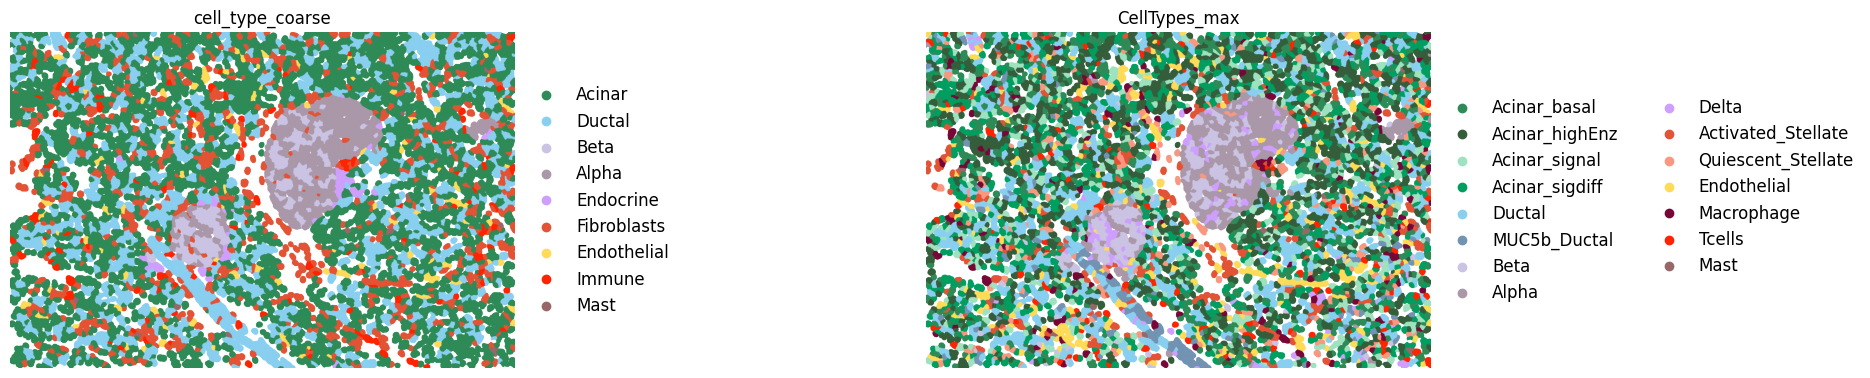

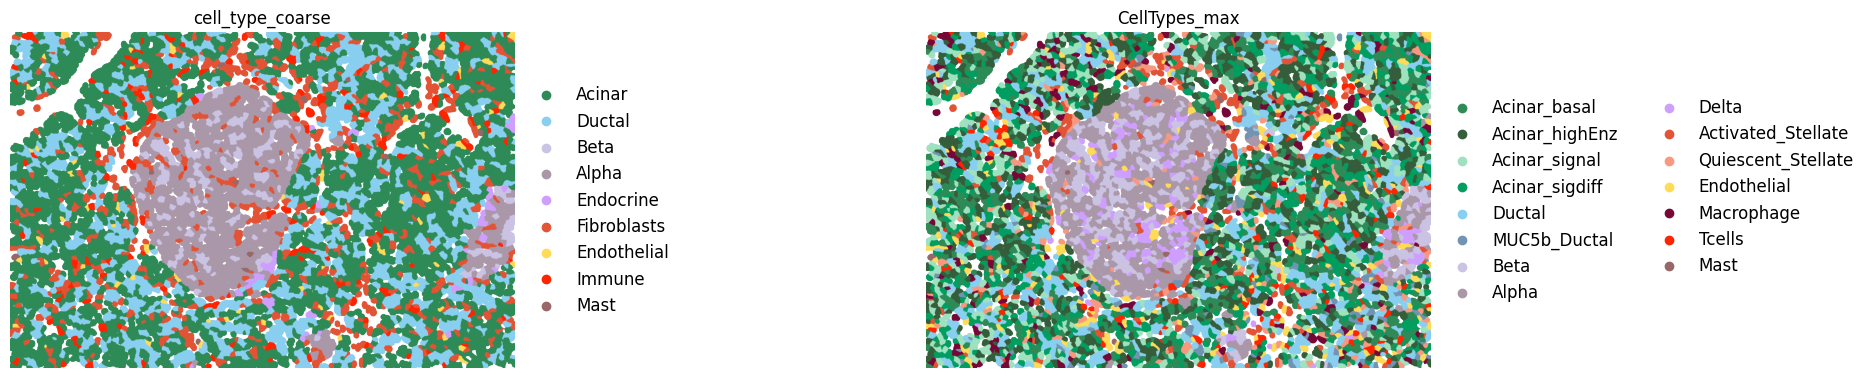

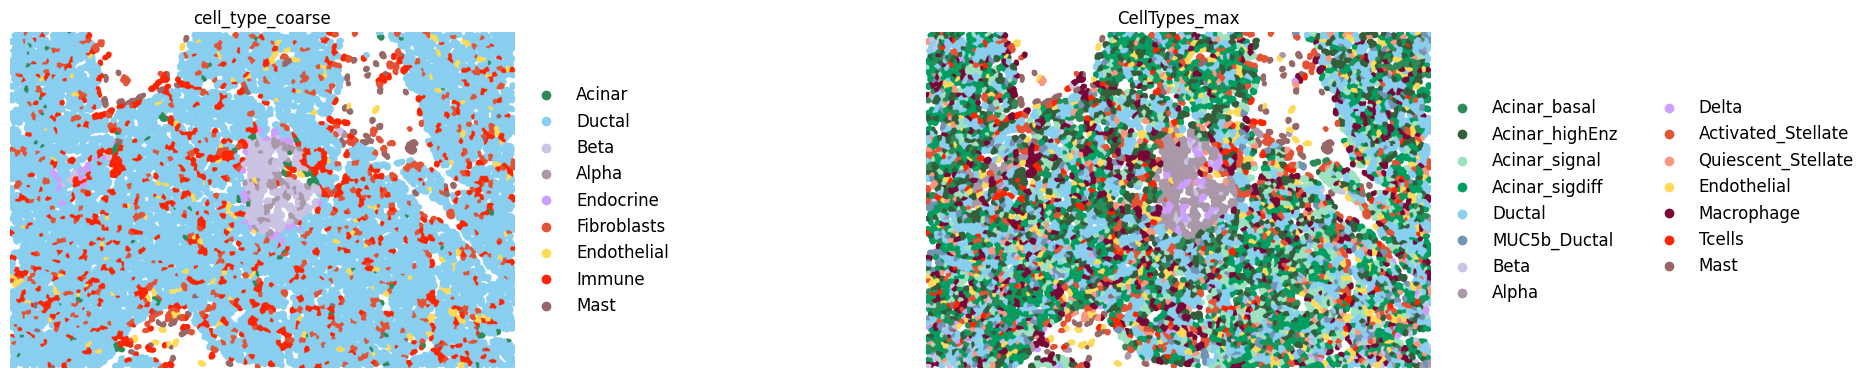

In [38]:
for i in range(len(adatas)):
    sq.pl.spatial_segment(adatas[i],
                          color=['cell_type_coarse','CellTypes_max'],
                          library_id='12',
                          library_key='fov', 
                          seg_cell_id='cell_ID',
                          img=False,frameon=False, wspace=0.5, legend_fontsize=12)

### Save objects

In [20]:
folder_path = '/lustre/groups/ml01/workspace/sara.jimenez/spatial_pancreas_data/preprocessed_data/data4downstream/'
sample_ids  = ["S1", "S2", "S3"]  
file_suffix = "_npod_annotation_refined.h5ad"

for i, sample_id in zip(range(len(adatas)), sample_ids):
    file_name = f"{sample_id}{file_suffix}"
    file_path = os.path.join(folder_path, file_name)
    adatas[i].write(file_path)

In [21]:
adatas

[AnnData object with n_obs × n_vars = 108711 × 979
     obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max'
     uns: 'CellTypes_max_colors', 'cell_type_coarse_colors', 'neighbors', 'pca', 'spatial', 'umap'
     obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_fov'
     layers: 'counts',
 AnnData object with n_obs × n_vars = 126421 × 979
     obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneSt

### Merge slides

In [39]:
adatas[0].obs['fov'] = adatas[0].obs['fov'].astype(str) + '_s1'
adatas[1].obs['fov'] = adatas[1].obs['fov'].astype(str) + '_s2'
adatas[2].obs['fov'] = adatas[2].obs['fov'].astype(str) + '_s3'

In [40]:
adata  = ad.concat(adatas, join='outer',uns_merge='same',axis=0)
adata

/home/aih/sara.jimenez/miniconda3/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 386727 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max'
    uns: 'CellTypes_max_colors', 'cell_type_coarse_colors', 'neighbors', 'pca', 'spatial'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_fov'
    layers: 'counts'

In [41]:
adata.write(folder_path+'merged_slides_npod_annotation_refined.h5ad')

In [26]:
adata.obsm['spatial_fov'].shape

(386727, 2)